In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('credit_rating_prediction_dataset.csv')
df.head()

,id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      1000 non-null   int64 
 1   checking_status         1000 non-null   object
 2   duration                1000 non-null   int64 
 3   credit_history          1000 non-null   object
 4   purpose                 1000 non-null   object
 5   credit_amount           1000 non-null   int64 
 6   savings_status          1000 non-null   object
 7   employment              1000 non-null   object
 8   installment_commitment  1000 non-null   int64 
 9   personal_status         1000 non-null   object
 10  other_parties           1000 non-null   object
 11  residence_since         1000 non-null   int64 
 12  property_magnitude      1000 non-null   object
 13  age                     1000 non-null   int64 
 14  other_payment_plans     1000 non-null   object
 15  housi

In [4]:
for col in df.columns:
    print(f'Col: {col} | {df[col].unique()}')

Col: id | [   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  195  

In [5]:
X = df.drop(['class','id'], axis = 1)
y = df['class']

In [6]:
col_names = X.columns

In [7]:
ct = make_column_transformer(
    (OneHotEncoder(), make_column_selector(dtype_include='object')),  
    (StandardScaler(), make_column_selector(dtype_include=['int64', 'float64'])),
)

In [8]:
X = ct.fit_transform(X)

In [9]:
X.shape

(1000, 61)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [11]:
model = LogisticRegression()

In [12]:
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_test_pred = model.predict(X_test)

In [14]:
y_test_pred

array(['good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good'

In [15]:
print(f'Accuracy: {(accuracy_score(y_test,y_test_pred)):.4f}')

Accuracy: 0.7600


In [16]:
print(confusion_matrix(y_test,y_test_pred))

[[ 29  31]
 [ 17 123]]


In [17]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         bad       0.63      0.48      0.55        60
        good       0.80      0.88      0.84       140

    accuracy                           0.76       200
   macro avg       0.71      0.68      0.69       200
weighted avg       0.75      0.76      0.75       200



In [18]:
cm = confusion_matrix(y_test,y_test_pred)

TN = cm [0][0]
FP = cm [0][1]
FN = cm [1][0]
TP = cm [1][1]

recall = TP / (TP+FN)

precision = TP / (TP+FP)

specificity = TN / (TN+FP)

sensitivity = TP / (TP+FN)

accuracy = (TP+TN)/(TP+FP+FN+TN)

print("Recall: ",recall)
print("Precision: ",precision)
print("Specificity: ",specificity)
print("Sensitivity: ",sensitivity)
print("Accuracy: ",accuracy)


Recall:  0.8785714285714286
Precision:  0.7987012987012987
Specificity:  0.48333333333333334
Sensitivity:  0.8785714285714286
Accuracy:  0.76


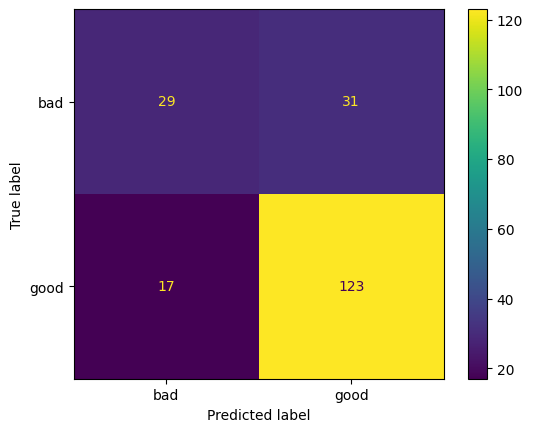

In [19]:
print(ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred))

In [20]:
comparison =pd.DataFrame({'Actual':y_test, 'Predicted': y_test_pred})
print(comparison[:15])
print(comparison[100:])

    Actual Predicted
586   good      good
803   good      good
846    bad      good
932   good      good
788    bad       bad
855   good      good
730   good      good
797   good      good
772   good      good
713   good      good
958    bad       bad
463   good      good
26    good      good
235    bad       bad
950   good      good
    Actual Predicted
744   good      good
913   good      good
466    bad       bad
89     bad      good
39    good      good
..     ...       ...
459   good      good
812    bad      good
888   good      good
490   good      good
784   good      good

[100 rows x 2 columns]


In [21]:
import joblib

joblib.dump(model, 'final_credits_model.pkl')
joblib.dump(list(col_names), 'credits_column_names.pkl')

['credits_column_names.pkl']

In [22]:
loaded_model = joblib.load('final_credits_model.pkl')
col_names = joblib.load('credits_column_names.pkl')

In [23]:
print('*** Making Predictions for new data *** ')

new_data_array = np.array([
    ['0<=X<200',5,'critical/other existing credit','business',1532,'>=1000','>=7',2,'female div/dep/mar', 'co applicant',1, 'no known property',46, 'bank', 'rent',2, 'high qualif/self emp/mgmt',2, 'none', 'no'],
    ['>=200',15,'delayed previously','repairs',4287,'<100','unemployed',3,'male mar/wid', 'none',2, 'car',32, 'stores', 'rent',1, 'skilled',1, 'yes', 'yes'],
    ['no checking',28,'existing paid','business',789,'100<=X<500','1<=X<4',1,'male div/sep', 'co applicant',4, 'real estate',68, 'bank', 'own',4, 'unskilled resident',2, 'none', 'yes', ],
    ['<0',42,'no credits/all paid','used car',3015,'no known savings','4<=X<7',4,'male single', 'guarantor',3,'life insurance',26, 'none', 'for free',3, 'unemp/unskilled non res',1, 'yes', 'no']
])

*** Making Predictions for new data *** 


In [24]:
new_data_array.shape

(4, 20)

In [25]:
X.shape

(1000, 61)

In [26]:
new_df = pd.DataFrame(new_data_array, columns=col_names)

In [27]:
new_df = new_df.fillna(0)
new_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0<=X<200,5,critical/other existing credit,business,1532,>=1000,>=7,2,female div/dep/mar,co applicant,1,no known property,46,bank,rent,2,high qualif/self emp/mgmt,2,none,no
1,>=200,15,delayed previously,repairs,4287,<100,unemployed,3,male mar/wid,none,2,car,32,stores,rent,1,skilled,1,yes,yes
2,no checking,28,existing paid,business,789,100<=X<500,1<=X<4,1,male div/sep,co applicant,4,real estate,68,bank,own,4,unskilled resident,2,none,yes
3,<0,42,no credits/all paid,used car,3015,no known savings,4<=X<7,4,male single,guarantor,3,life insurance,26,none,for free,3,unemp/unskilled non res,1,yes,no


In [28]:
new_data_transformed = ct.transform(new_df)

In [29]:
prediction = loaded_model.predict(new_data_transformed)
prediction

array(['good', 'bad', 'good', 'good'], dtype=object)